In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [2]:
df = pd.read_excel('premiums.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [3]:
df.shape

(50000, 13)

In [4]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [6]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


### Handle Null values

In [7]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [10]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [12]:
df[df.number_of_dependants <0].shape

(72, 13)

In [13]:
df[df.number_of_dependants <0]['number_of_dependants'].unique()

array([-3, -1])

In [14]:
df['number_of_dependants']= abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [15]:
# Get only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Show the names of numeric columns
print(numeric_cols.columns)


Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')


In [16]:
numeric_columns  = df.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

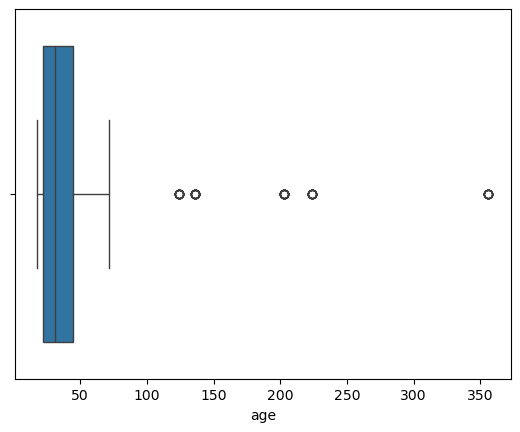

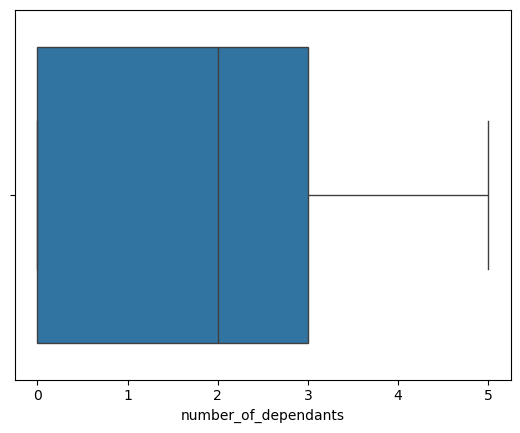

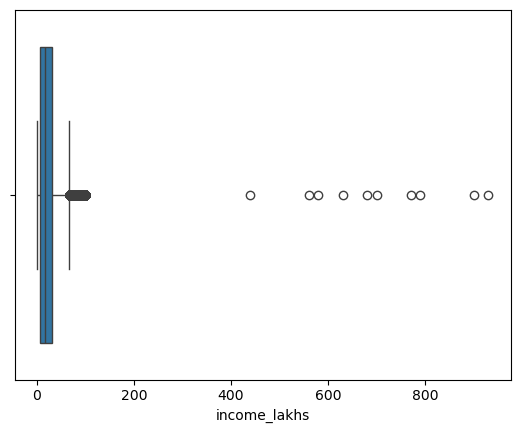

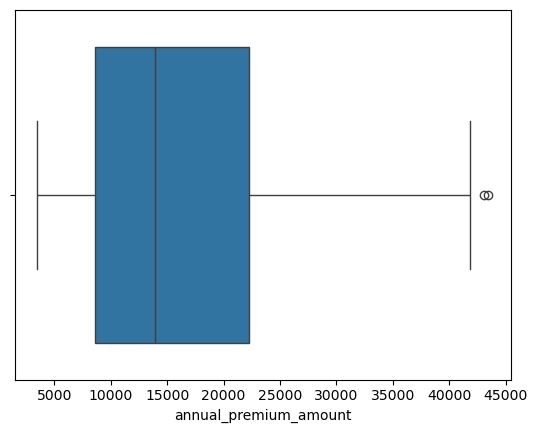

In [17]:
for col in numeric_columns:
    sns.boxplot(x= df[col])
    plt.show()

In [18]:
df[df['age']>100].shape

(58, 13)

In [19]:
df= df[df['age']<=100]

In [20]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


In [21]:
df.shape

(49918, 13)

<Axes: xlabel='income_lakhs', ylabel='Count'>

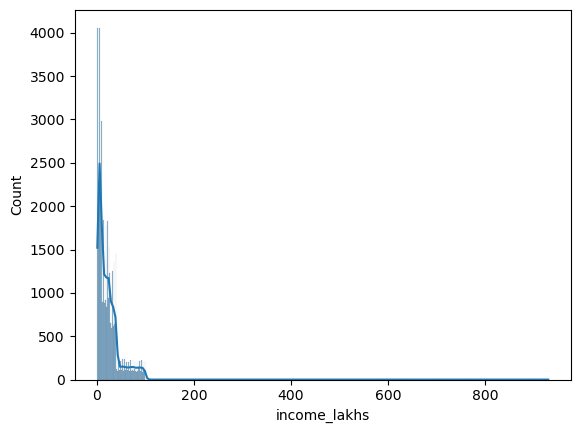

In [22]:
sns.histplot(df['income_lakhs'], kde = True)

In [23]:
df[df['income_lakhs']>100]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
2635,51,Male,Northwest,Married,4,Obesity,No Smoking,Self-Employed,> 40L,560,High blood pressure,Gold,30692
4220,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,440,No Disease,Silver,10636
7775,35,Female,Northeast,Unmarried,0,Overweight,No Smoking,Salaried,> 40L,630,Diabetes,Gold,24010
9021,43,Male,Southeast,Married,3,Obesity,Regular,Salaried,> 40L,900,Diabetes & Thyroid,Gold,30848
10337,37,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,> 40L,930,Diabetes,Silver,15945
10639,20,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,580,Thyroid,Silver,12888
11456,21,Female,Southwest,Unmarried,0,Obesity,No Smoking,Freelancer,> 40L,700,No Disease,Bronze,7424
15437,21,Female,Southeast,Unmarried,0,Normal,Occasional,Salaried,> 40L,790,No Disease,Silver,7586
35446,59,Male,Northwest,Married,2,Obesity,Occasional,Self-Employed,> 40L,770,Thyroid,Gold,31115
40970,48,Male,Northeast,Married,4,Obesity,No Smoking,Salaried,> 40L,680,No Disease,Gold,28926


In [24]:
# Finding lower and upper quantile limit
Q1, Q3 = df['income_lakhs'].quantile([0.25,0.75])
Q1, Q3

(7.0, 31.0)

In [25]:
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
lower, upper

(-29.0, 67.0)

In [26]:
quantile_threshold = df.income_lakhs.quantile(0.999)
quantile_threshold

100.0

In [27]:
df[df['income_lakhs']>100].shape

(10, 13)

In [28]:
df= df[df['income_lakhs']<=quantile_threshold]
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [29]:
df.shape

(49908, 13)

In [30]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


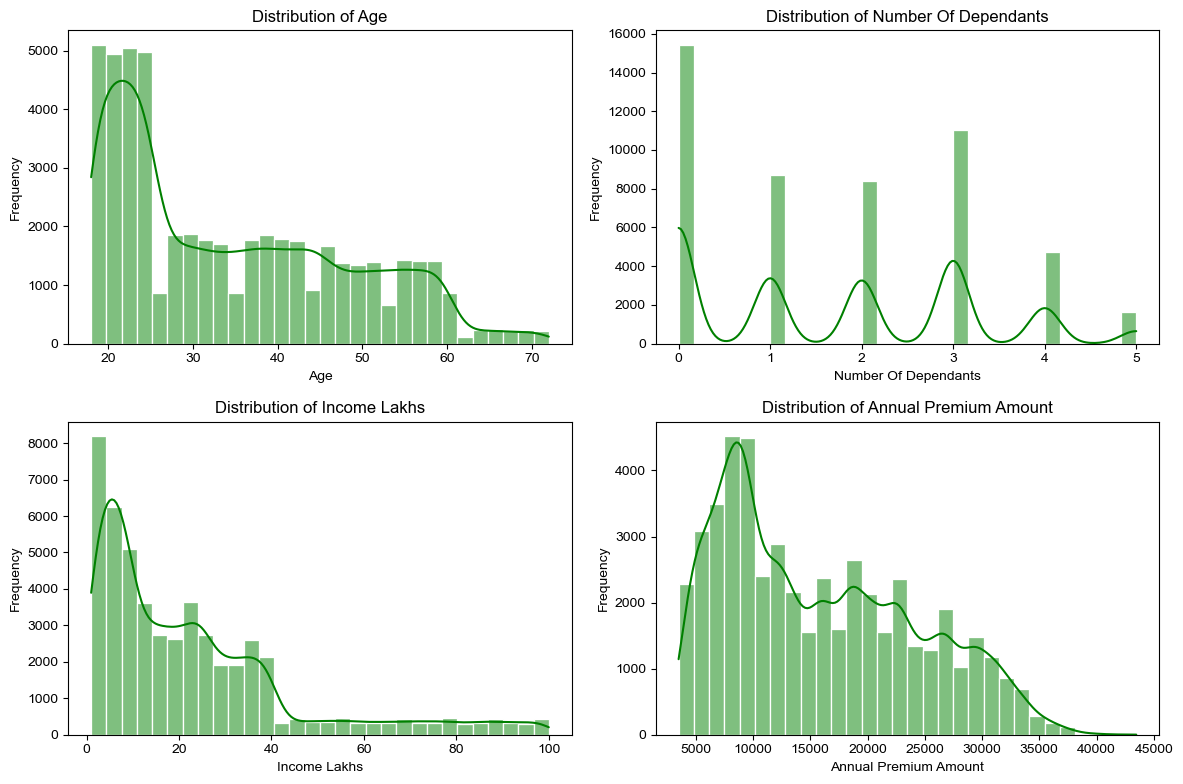

In [31]:
# Columns to plot
cols = ['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount']

# Set up the 2x2 plot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.set(style='whitegrid')

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through each column and plot
for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, color='green', ax=axes[i])
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

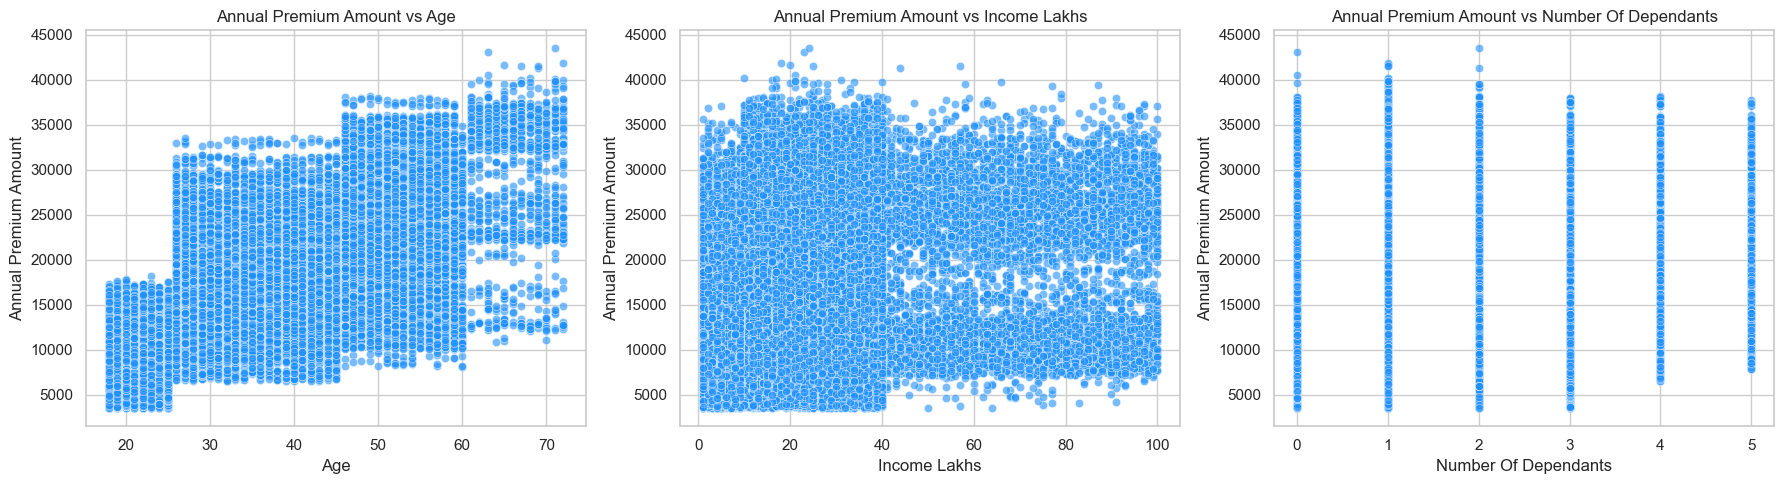

In [32]:
cols = ['age', 'income_lakhs', 'number_of_dependants']
target = 'annual_premium_amount'

# Set Seaborn style
sns.set(style='whitegrid')

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Generate scatter plots
for i, col in enumerate(cols):
    sns.scatterplot(data=df, x=col, y=target, ax=axes[i], color='dodgerblue', alpha=0.6)
    axes[i].set_title(f'{target.replace("_", " ").title()} vs {col.replace("_", " ").title()}')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel(target.replace("_", " ").title())

plt.tight_layout()
plt.show()

In [33]:
df.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
dtype: object

In [34]:
# Filter categorical columns (dtype == object)
categorical_cols = df.select_dtypes(include='object').columns

# Print unique values for each categorical column
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: gender
['Male' 'Female']

Column: region
['Northwest' 'Southeast' 'Northeast' 'Southwest']

Column: marital_status
['Unmarried' 'Married']

Column: bmi_category
['Normal' 'Obesity' 'Overweight' 'Underweight']

Column: smoking_status
['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']

Column: employment_status
['Salaried' 'Self-Employed' 'Freelancer']

Column: income_level
['<10L' '10L - 25L' '> 40L' '25L - 40L']

Column: medical_history
['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']

Column: insurance_plan
['Bronze' 'Silver' 'Gold']


In [35]:
df['smoking_status'] = df['smoking_status'].replace(
    ['Smoking=0', 'Does Not Smoke', 'Not Smoking'], 'No Smoking'
)

In [36]:
df['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

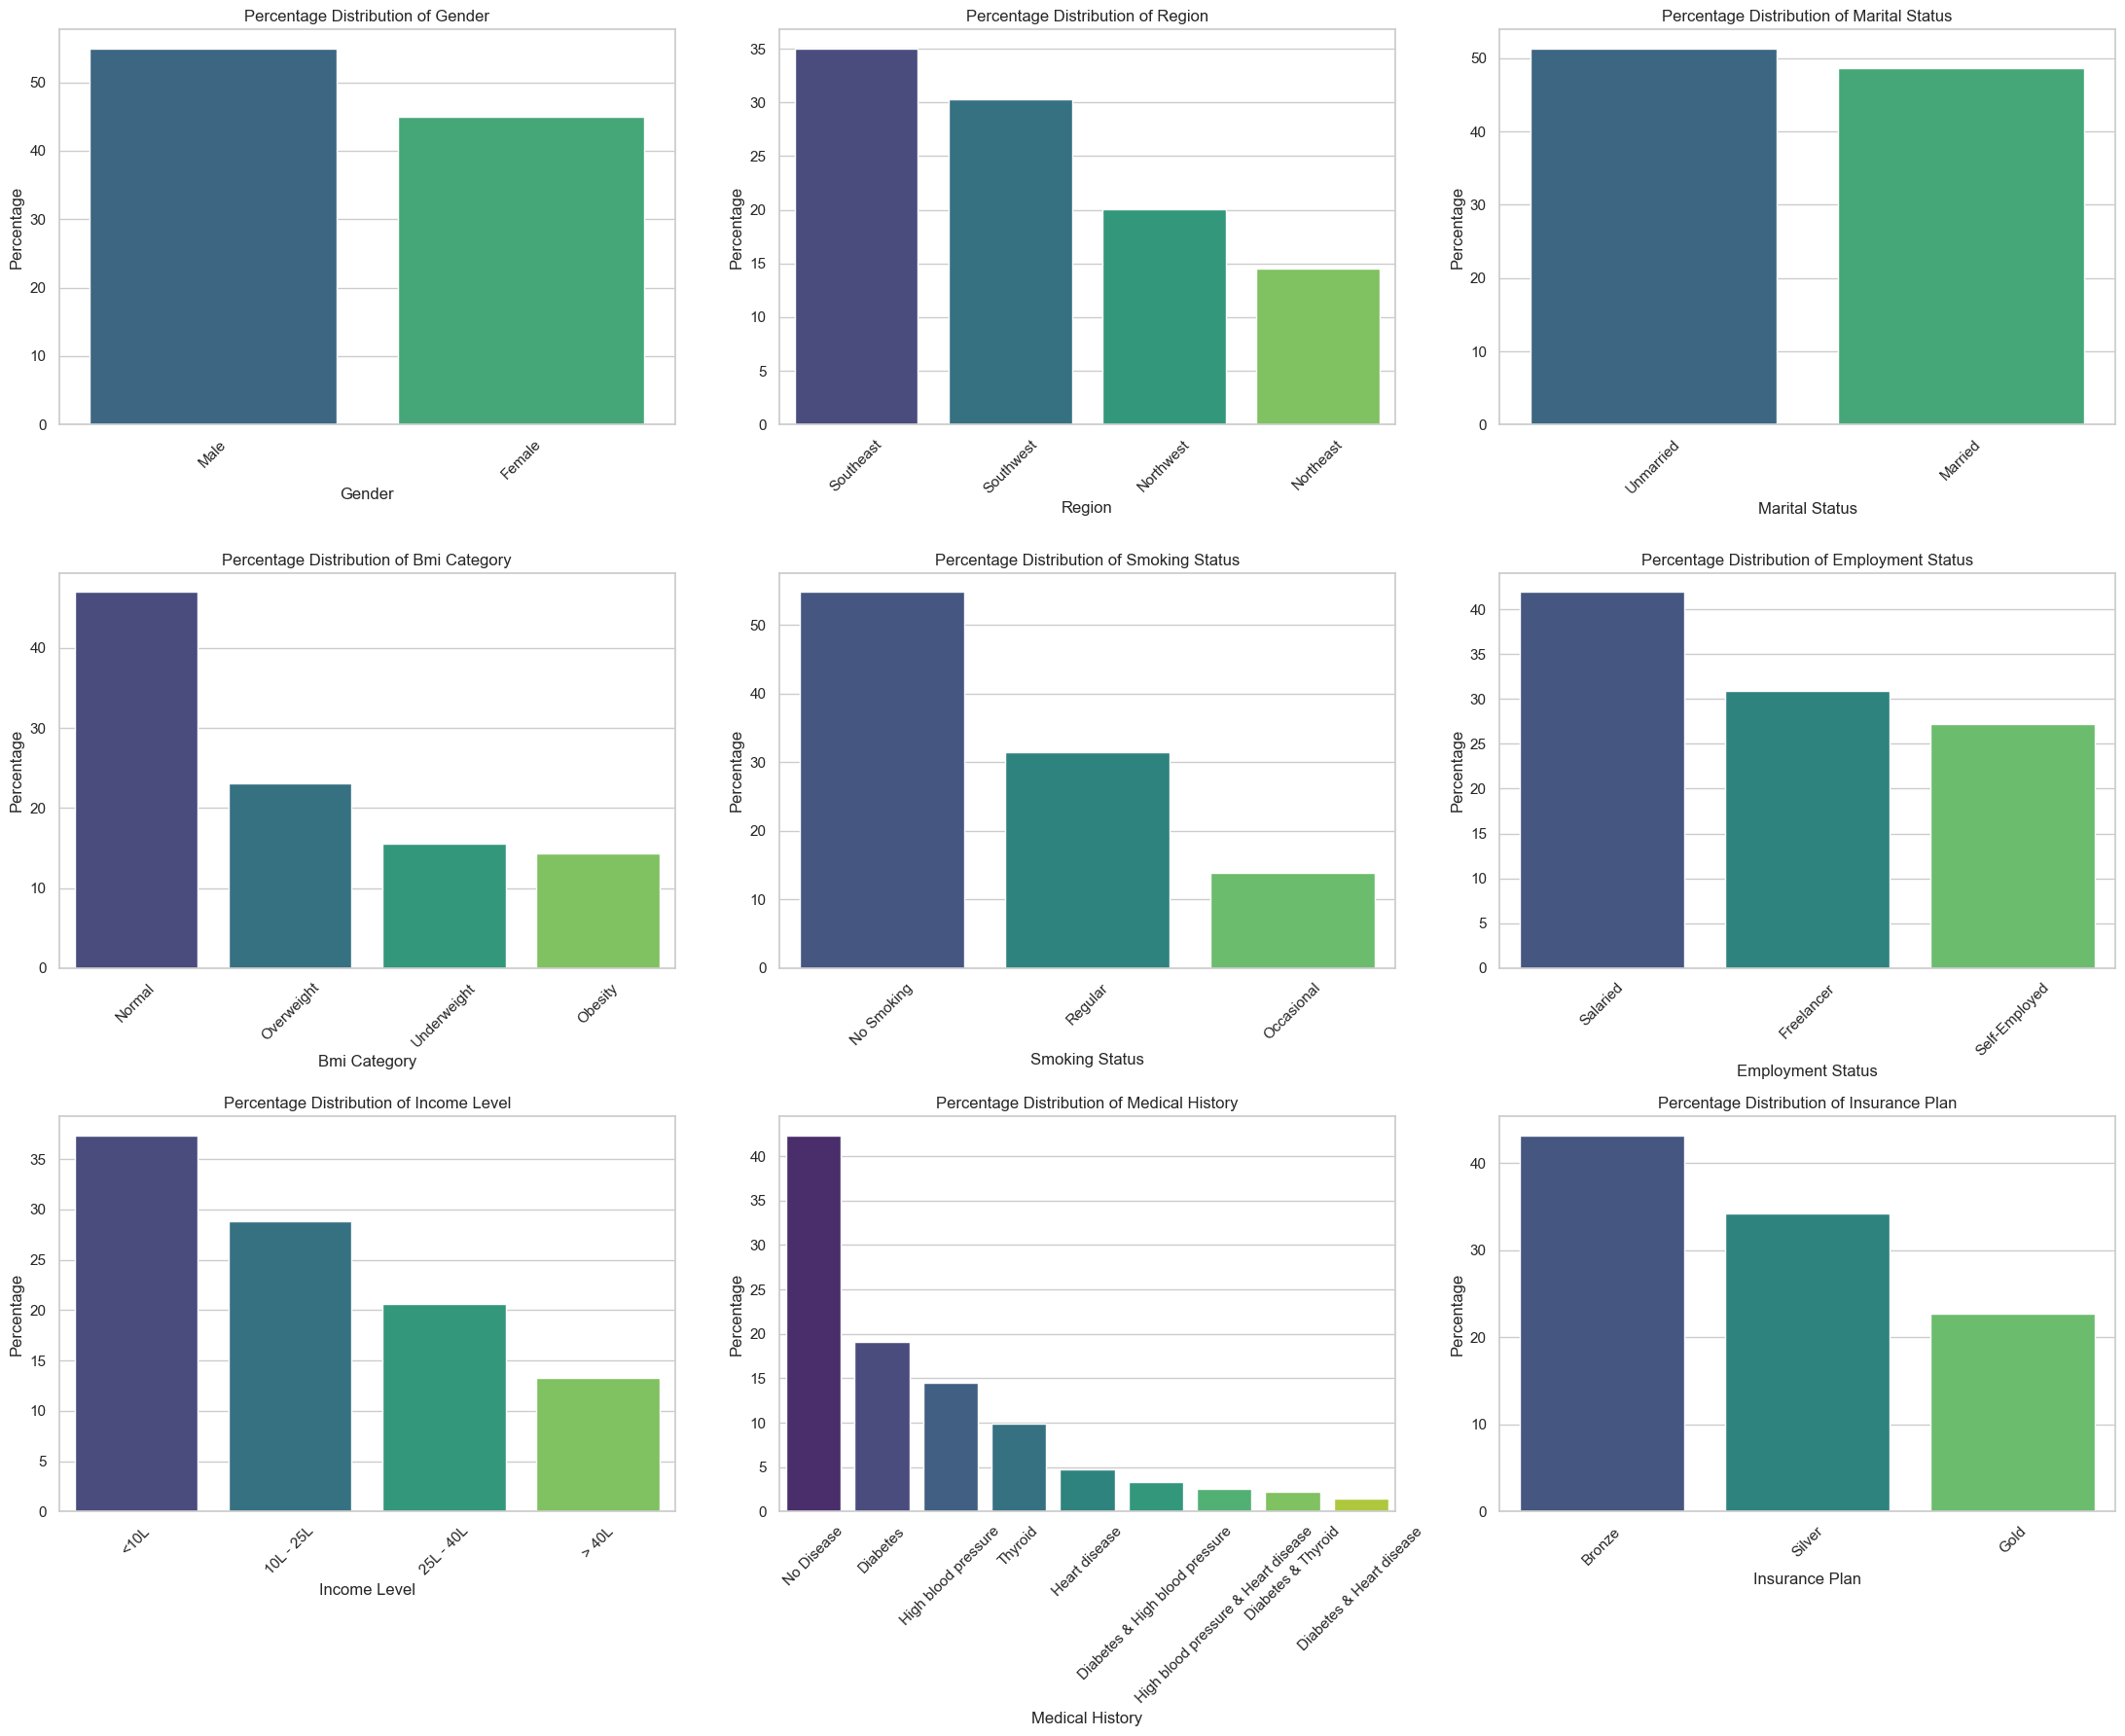

In [37]:
# Set plot style
sns.set(style='whitegrid')

# Select up to 9 categorical columns
categorical_cols = df.select_dtypes(include='object').columns[:9]

# Set up 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(22, 18))
axes = axes.flatten()

# Loop through each column and plot
for i, col in enumerate(categorical_cols):
    # Calculate percentage values
    percent_values = df[col].value_counts(normalize=True).mul(100).reset_index()
    percent_values.columns = [col, 'percentage']

    # Plot with hue to avoid deprecation warning
    sns.barplot(
        data=percent_values,
        x=col,
        y='percentage',
        hue=col,
        palette='viridis',
        legend=False,
        ax=axes[i]
    )

    # Title and labels
    axes[i].set_title(f'Percentage Distribution of {col.replace("_", " ").title()}')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused axes (if <9 categorical columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

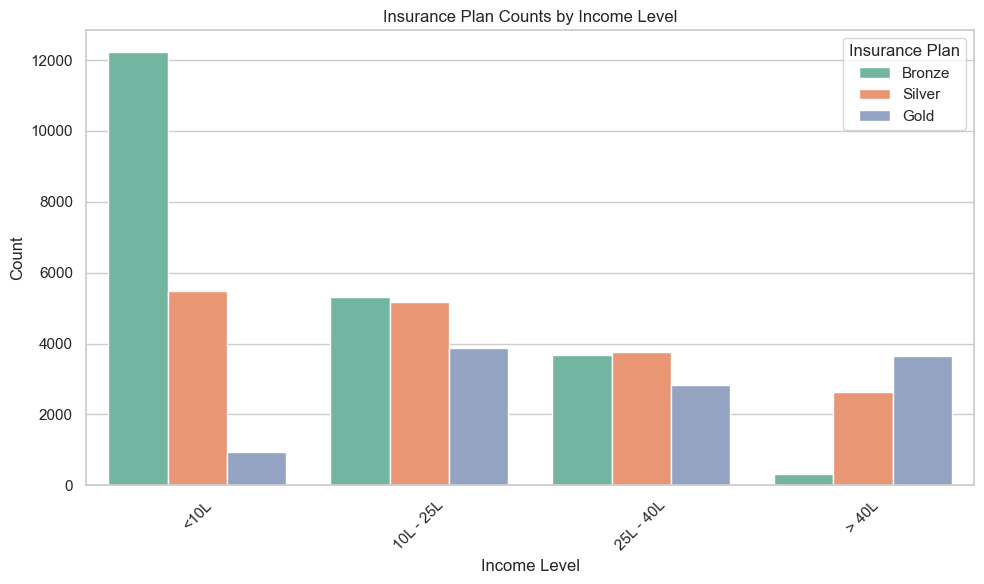

In [38]:
# Insurance Plan vs Income_level
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='income_level',
    hue='insurance_plan',
    palette='Set2',
    order=['<10L', '10L - 25L', '25L - 40L', '> 40L']
)
plt.title('Insurance Plan Counts by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Insurance Plan')
plt.tight_layout()
plt.show()

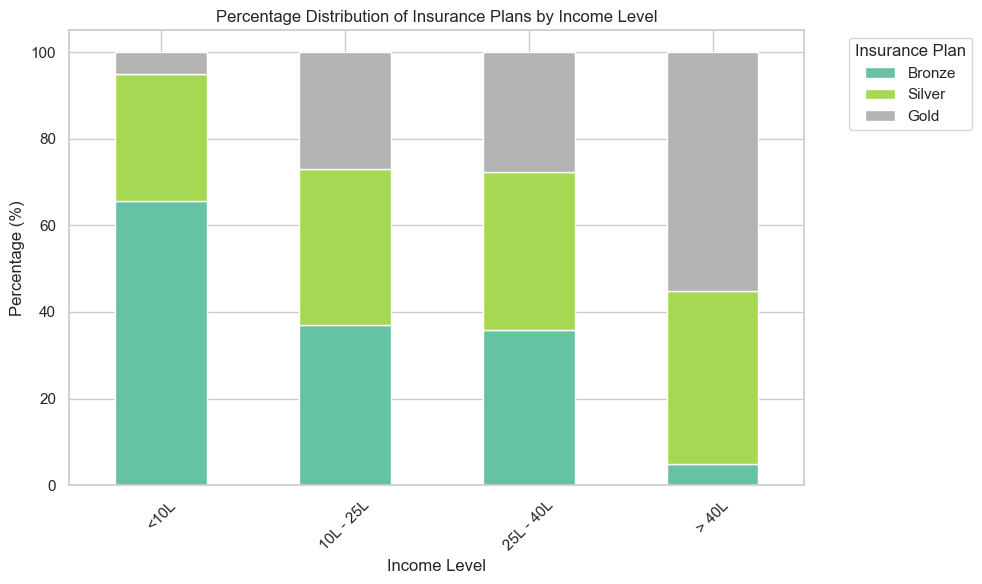

In [39]:

# Create a cross-tab of Income Level vs Insurance Plan with percentages
ct = pd.crosstab(df['income_level'], df['insurance_plan'], normalize='index') * 100

# Reorder columns and index for better visualization if needed
ct = ct[['Bronze', 'Silver', 'Gold']]
ct = ct.loc[['<10L', '10L - 25L', '25L - 40L', '> 40L']]

# Plot stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Percentage Distribution of Insurance Plans by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Insurance Plan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Feature Engineering

In [40]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [41]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [42]:
df.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [43]:
risk_scores = {
    "diabetes":4,
    "heart disease":8,
    "high blood pressure":6,
    "thyroid":5,
    "no disease":0,
    "none":0
}

In [44]:
df[['disease1', 'disease2']]=df['medical_history'].str.split("&", expand =True).apply(lambda x: x.str.lower())
df.head(10)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,None
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,None
5,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,diabetes,None
6,33,Male,Southeast,Married,3,Normal,Regular,Self-Employed,<10L,4,Diabetes & High blood pressure,Silver,20653,diabetes,high blood pressure
7,43,Male,Northeast,Married,3,Overweight,Regular,Salaried,> 40L,46,Thyroid,Gold,26926,thyroid,None
8,59,Female,Southeast,Unmarried,0,Overweight,No Smoking,Freelancer,10L - 25L,21,No Disease,Gold,26101,no disease,None
9,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,None


In [45]:
df.isna().sum()

age                          0
gender                       0
region                       0
marital_status               0
number_of_dependants         0
bmi_category                 0
smoking_status               0
employment_status            0
income_level                 0
income_lakhs                 0
medical_history              0
insurance_plan               0
annual_premium_amount        0
disease1                     0
disease2                 45140
dtype: int64

In [46]:
df['disease1'] = df['disease1'].fillna('none')
df['disease2'] = df['disease2'].fillna('none')

In [47]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
disease1                 0
disease2                 0
dtype: int64

In [48]:
# Set risk score to 0
df['total_risk_score'] = 0

# Sum risk scores from both disease columns safely
for disease in ['disease1', 'disease2']:
    df['total_risk_score'] += (
        df[disease]
        .fillna('none')                      # handle NaNs
        .str.lower()                         # ensure case-insensitive match
        .map(risk_scores)
        .fillna(0)                           # handle unmatched values
    )

# Normalize the total risk score
min_score = df['total_risk_score'].min()
max_score = df['total_risk_score'].max()
df['normalized_risk_score'] = (df['total_risk_score'] - min_score) / (max_score - min_score)

# Display preview
df[['disease1', 'disease2', 'total_risk_score', 'normalized_risk_score']].head()

,disease1,disease2,total_risk_score,normalized_risk_score
0,diabetes,none,4.0,0.50
1,diabetes,none,4.0,0.50
2,high blood pressure,none,6.0,0.75
3,no disease,none,0.0,0.00
4,high blood pressure,none,6.0,0.75


In [49]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,4.0,0.50
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,4.0,0.50
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6.0,0.75
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0.0,0.00
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6.0,0.75


In [50]:
df.shape

(49908, 17)

In [51]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
disease1                 0
disease2                 0
total_risk_score         0
normalized_risk_score    0
dtype: int64

In [52]:
df['insurance_plan'] = df['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
df.insurance_plan.unique()

array([1, 2, 3])

In [53]:
df['income_level'] = df['income_level'].map({'<10L':1, '10L - 25L':2, '25L - 40L':3, '> 40L':4})
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,diabetes,none,4.0,0.50
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,diabetes,none,4.0,0.50
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,high blood pressure,none,6.0,0.75
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,4,77,No Disease,3,20303,no disease,none,0.0,0.00
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,high blood pressure,none,6.0,0.75


In [54]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status','employment_status']
df = pd.get_dummies(df, columns = nominal_cols, drop_first =True, dtype=int)
df.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,4.0,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,4.0,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6.0,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,no disease,none,0.0,...,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,6.0,...,0,0,1,0,1,0,0,1,0,1


In [55]:
df = df.drop(['medical_history', 'disease1', 'disease2', 'total_risk_score'], axis=1)
df.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.50,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.50,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.75,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.00,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.75,1,0,0,0,1,0,1,0,0,1,0,1


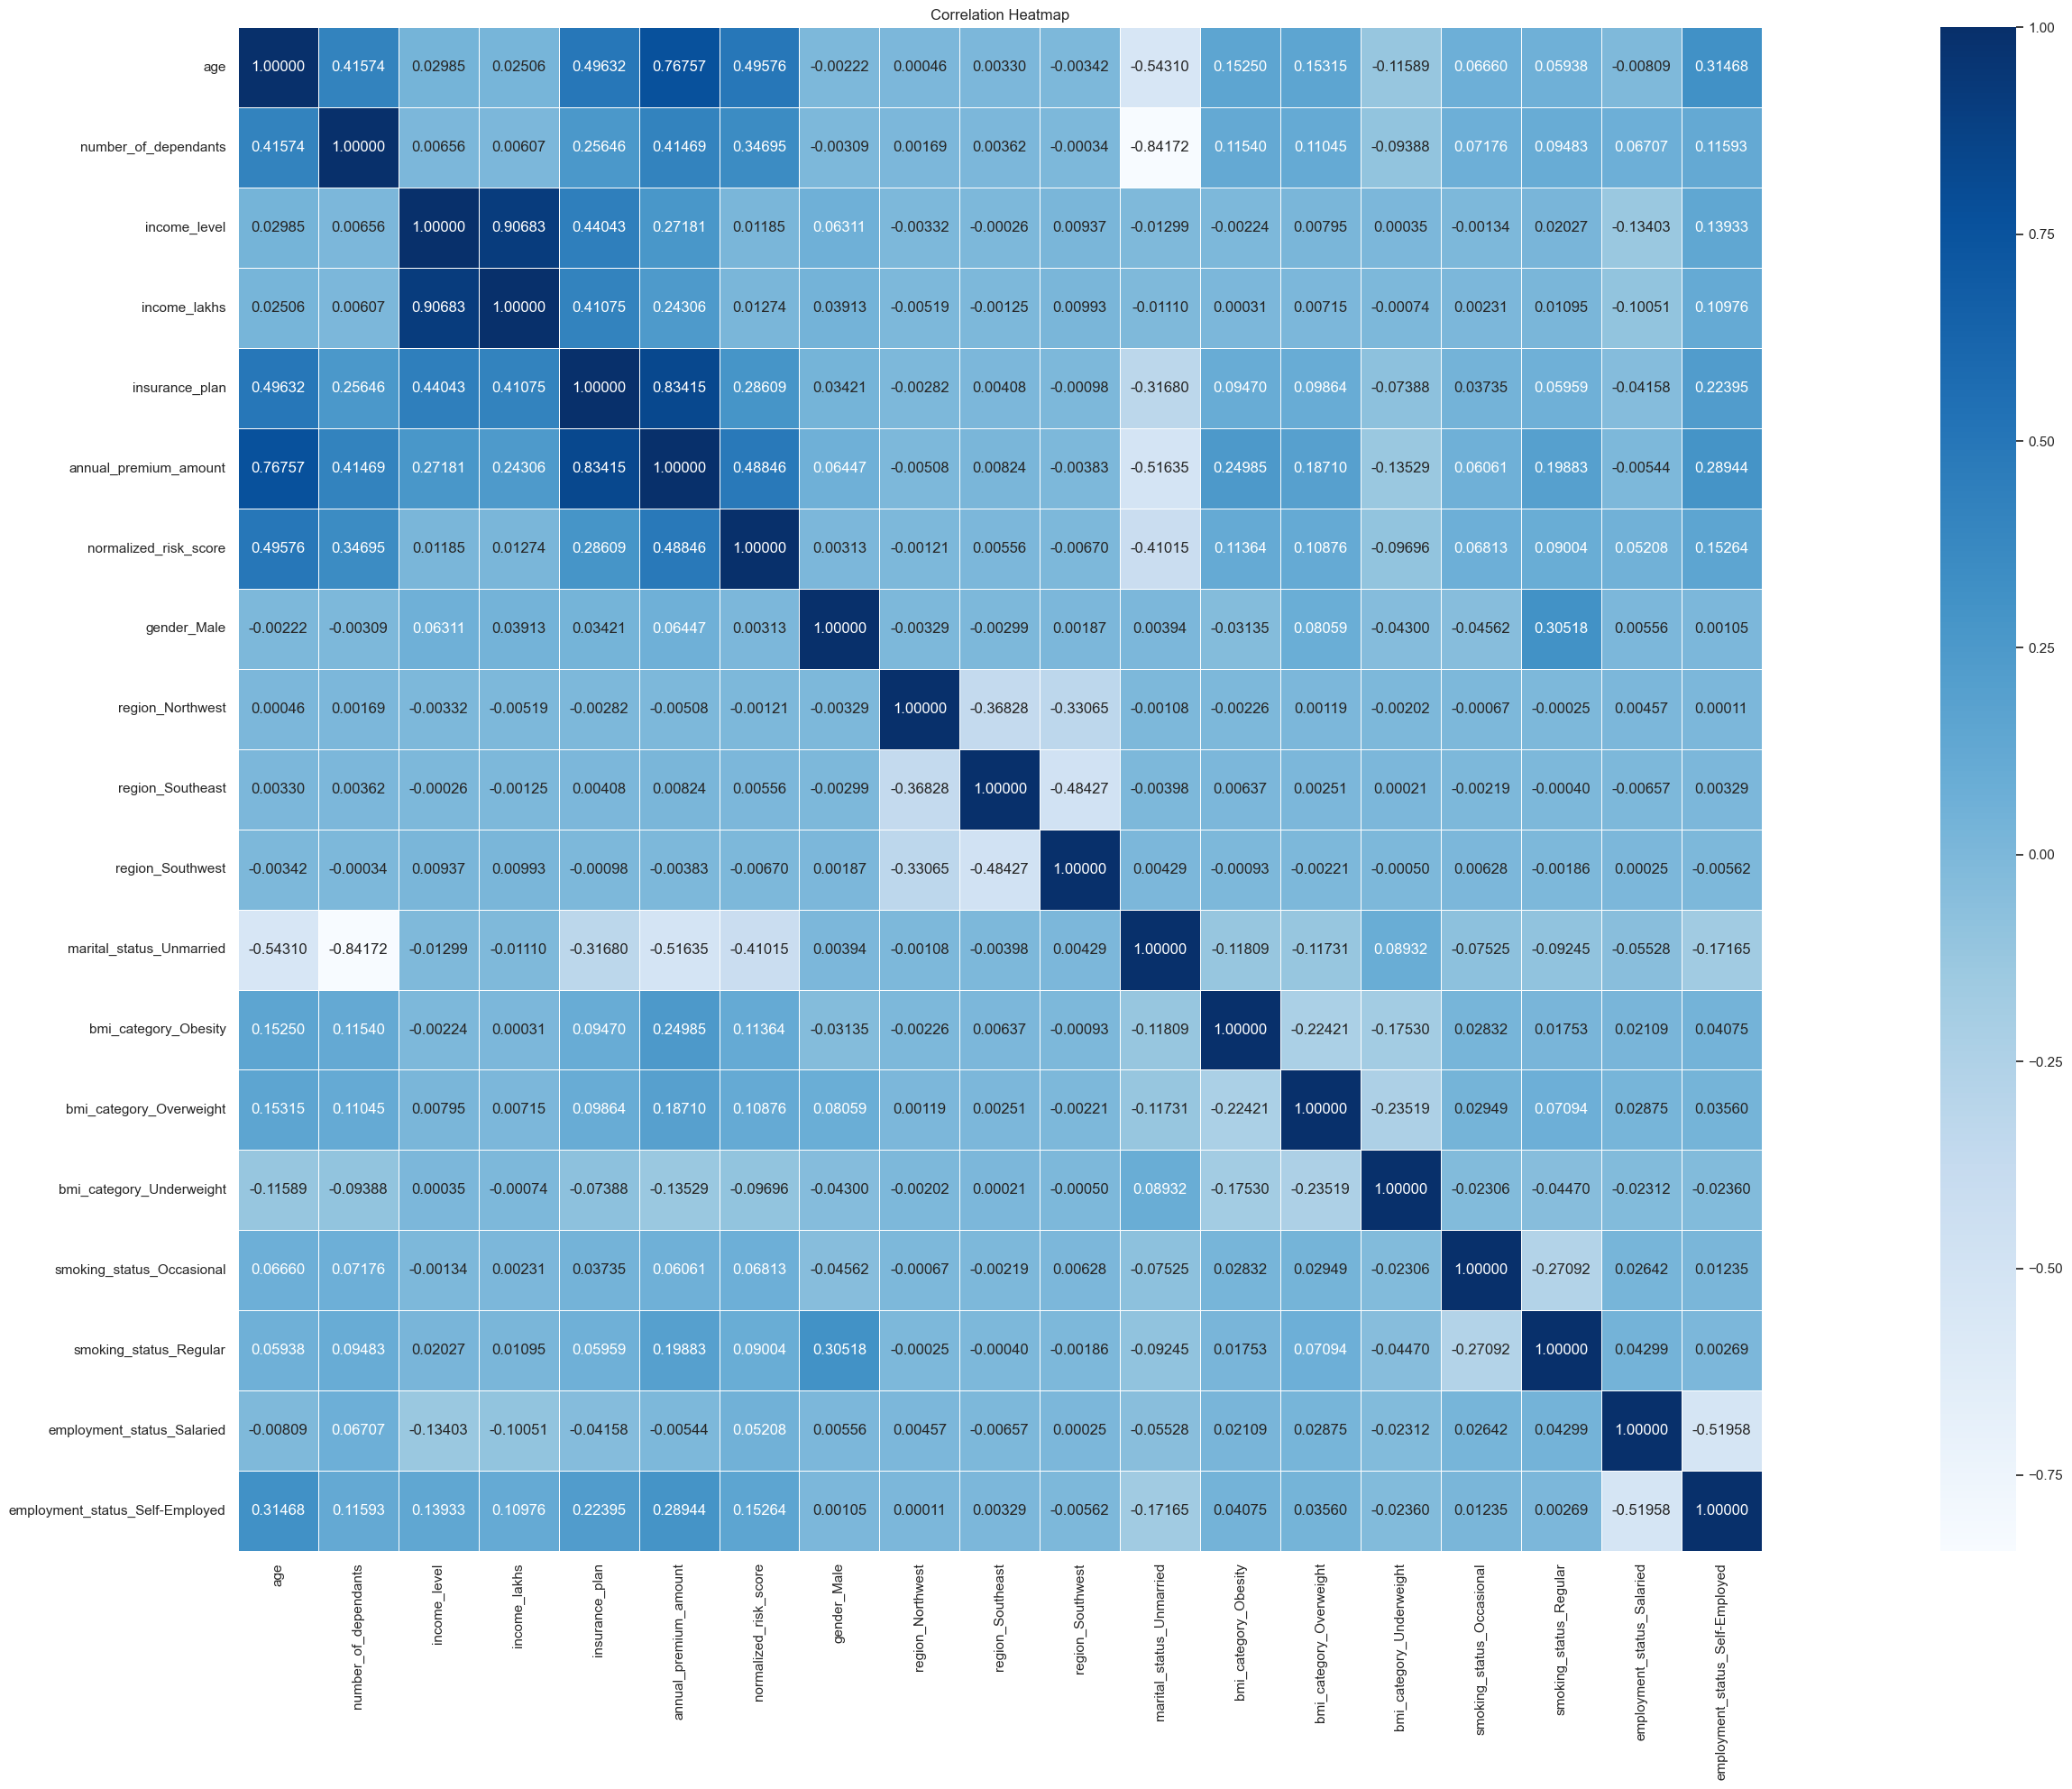

In [56]:
# Select only numeric columns for correlation
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(40, 20))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".5f", linewidths=0.5, square=True)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [57]:
X = df.drop('annual_premium_amount', axis='columns')
y= df['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age', 'number_of_dependants','income_level', 'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.000000,0.050505,0.0,0.50,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.000000,0.050505,0.0,0.50,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.333333,0.191919,0.5,0.75,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,1.000000,0.767677,1.0,0.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,1.000000,0.989899,0.5,0.75,1,0,0,0,1,0,1,0,0,1,0,1


In [58]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,0.312362,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,0.341858,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.625000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column']= data.columns
    vif_df['VIF']= [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [60]:
calculate_vif(X)

,Column,VIF
0,age,4.743804
1,number_of_dependants,4.466142
2,income_level,12.450172
3,income_lakhs,11.183347
4,insurance_plan,3.586573
5,normalized_risk_score,2.544546
6,gender_Male,2.421485
7,region_Northwest,2.100095
8,region_Southeast,2.917215
9,region_Southwest,2.665131


In [61]:
calculate_vif(X.drop('income_level', axis ='columns'))

,Column,VIF
0,age,4.725291
1,number_of_dependants,4.456998
2,income_lakhs,2.480485
3,insurance_plan,3.446501
4,normalized_risk_score,2.544379
5,gender_Male,2.409981
6,region_Northwest,2.098242
7,region_Southeast,2.914423
8,region_Southwest,2.662649
9,marital_status_Unmarried,3.394433


In [62]:
X_new = X.drop('income_level', axis='columns')
X_new.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.50,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.050505,0.0,0.50,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.191919,0.5,0.75,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,0.767677,1.0,0.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,0.989899,0.5,0.75,1,0,0,0,1,0,1,0,0,1,0,1


### Model Training

In [63]:
X_train,X_test, y_train,  y_test = train_test_split(X_new, y, test_size=0.3,  random_state=10)

In [64]:
print('X train:', X_train.shape)
print('X test:', X_test.shape)
print('y train:', y_train.shape)
print('y test:', y_test.shape)

X train: (34935, 17)
X test: (14973, 17)
y train: (34935,)
y test: (14973,)


In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test,y_test)
train_score, test_score

(0.9120896141185599, 0.9131386415679918)

In [66]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 6236574.334601991
R-squared Score: 0.9131386415679918


In [67]:
lr.intercept_

5519.60539549342

In [68]:
lr.coef_

array([11705.97530308,  -525.53382037,  -543.4697419 , 12627.59843506,
        1879.71360003,   127.80781395,   -68.55483555,    24.52547959,
         -28.19335206, -1321.89352894,  3415.7317974 ,  1631.75583967,
         370.28707114,   858.11143053,  2358.1131678 ,   249.36969446,
         489.33293541])

In [69]:
X_new.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [70]:
feature_importances = lr.coef_
coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by = 'Coefficients', ascending=True)
coef_df

,Coefficients
marital_status_Unmarried,-1321.893529
income_lakhs,-543.469742
number_of_dependants,-525.533820
region_Northwest,-68.554836
region_Southwest,-28.193352
region_Southeast,24.525480
gender_Male,127.807814
employment_status_Salaried,249.369694
bmi_category_Underweight,370.287071
employment_status_Self-Employed,489.332935


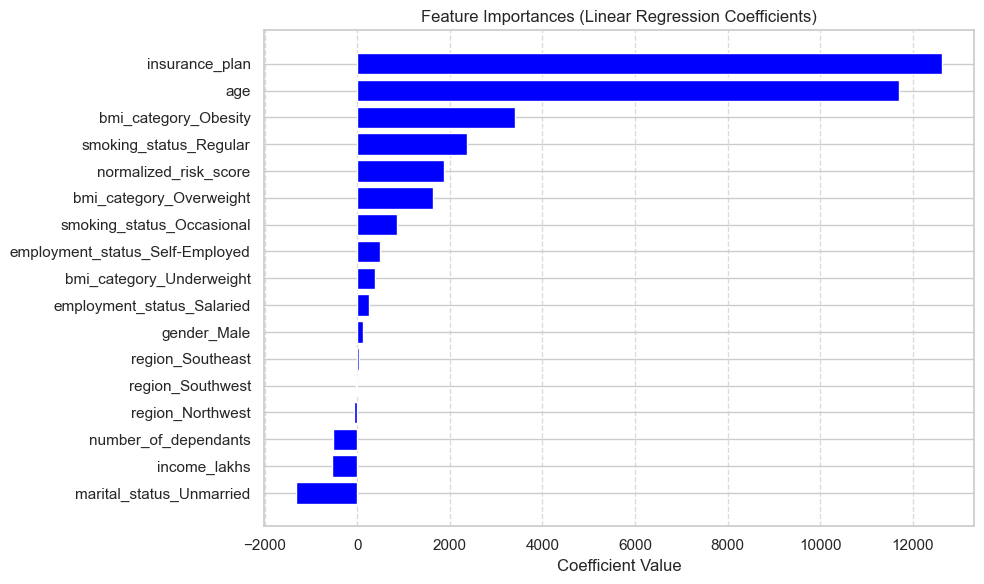

In [71]:
# Plotting horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coefficients'], color='blue')
plt.xlabel("Coefficient Value")
plt.title("Feature Importances (Linear Regression Coefficients)")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Using Ridge Regression

In [72]:
rr = Ridge(alpha=10)
rr.fit(X_train, y_train)
train_score = rr.score(X_train, y_train)
test_score = rr.score(X_test,y_test)
train_score, test_score

(0.9120853674119354, 0.9131353259791957)

In [73]:
# Using Lasoo Regression

In [74]:
lasso = Lasso(alpha=1.0)  # You can tune alpha for regularization strength
lasso.fit(X_train, y_train)
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test,y_test)
train_score, test_score

(0.9120866066649012, 0.9131712393812341)

In [75]:
# Using Decision Tree 

In [76]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test,y_test)
train_score, test_score

(0.9990435762530592, 0.9361596577083348)

In [77]:
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 4583684.246200902
R-squared Score: 0.9361596577083348


In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test,y_test)
train_score, test_score

(0.9941478561524534, 0.9643538351827434)

In [79]:
!pip install xgboost

from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
train_score = xgb.score(X_train, y_train)
test_score = xgb.score(X_test,y_test)
train_score, test_score

(0.9743822813034058, 0.9677518606185913)

In [80]:
y_pred = xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 2315388.303193153
R-squared Score: 0.9677518606185913


In [81]:
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_search = RandomizedSearchCV(dt, dt_param_grid, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1)
dt_search.fit(X_train, y_train)
print("Best DecisionTree Params:", dt_search.best_params_)


Best DecisionTree Params: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}


In [82]:
dt_search.best_score_

0.9650132536379914

In [83]:
best_model =dt_search.best_estimator_

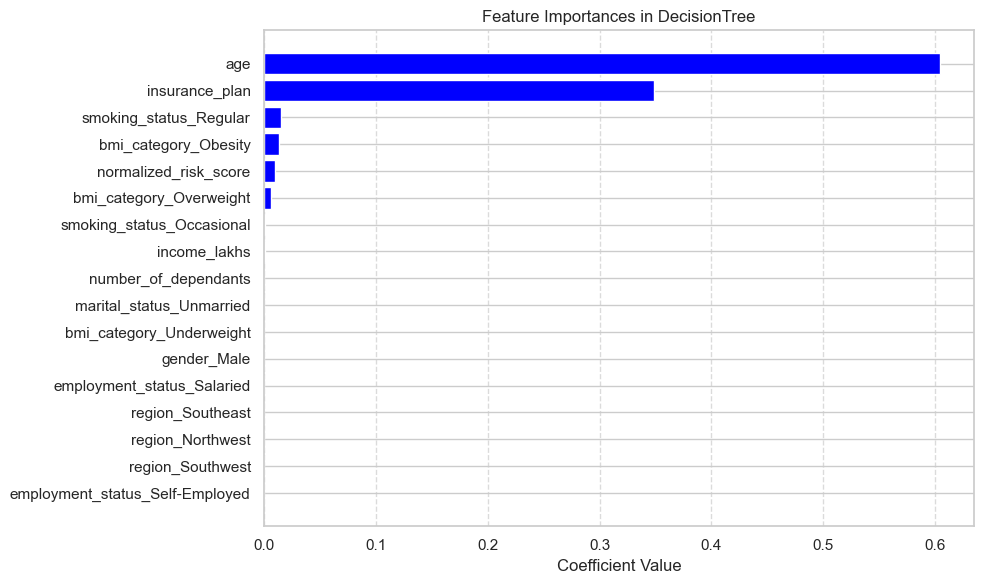

In [84]:
feature_importances = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by = 'Coefficients', ascending=True)
coef_df
# Plotting horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coefficients'], color='blue')
plt.xlabel("Coefficient Value")
plt.title("Feature Importances in DecisionTree")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [85]:
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=5,
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=1  # safer and more stable
)

rf_search.fit(X_train, y_train)
print("Best RandomForest Params:", rf_search.best_params_)

Best RandomForest Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


In [86]:
rf_search.best_score_

0.966442213613567

In [87]:
best_model =rf_search.best_estimator_

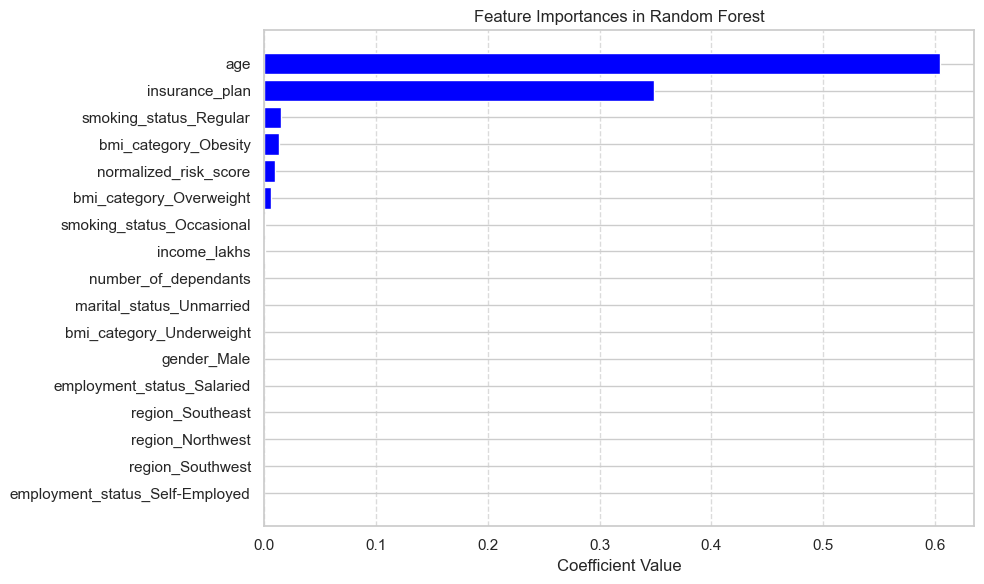

In [88]:
eature_importances = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by = 'Coefficients', ascending=True)
coef_df
# Plotting horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coefficients'], color='blue')
plt.xlabel("Coefficient Value")
plt.title("Feature Importances in Random Forest")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [89]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_search = RandomizedSearchCV(xgb, xgb_param_grid, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1)
xgb_search.fit(X_train, y_train)
print("Best XGBoost Params:", xgb_search.best_params_)


Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2}


In [90]:
xgb_search.best_score_

0.9676607966423034

In [91]:
best_model =xgb_search.best_estimator_

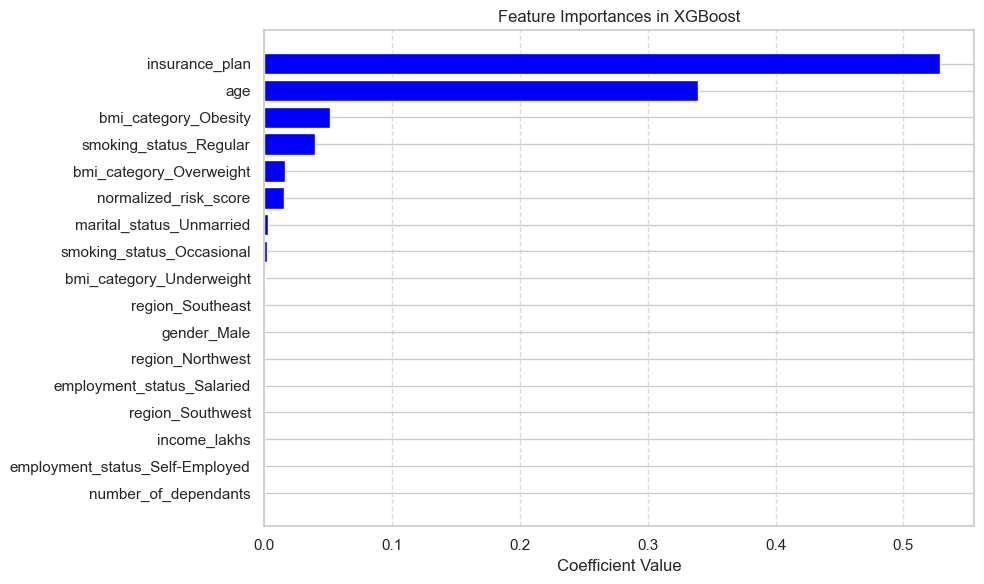

In [92]:
feature_importances = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by = 'Coefficients', ascending=True)
coef_df
# Plotting horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coefficients'], color='blue')
plt.xlabel("Coefficient Value")
plt.title("Feature Importances in XGBoost")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Error Analysis

In [93]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
})

results_df.head()

,actual,predicted,diff,diff_pct
3598,20554,20565.074219,11.074219,0.053879
35794,29647,31947.859375,2300.859375,7.760851
43608,20560,22636.707031,2076.707031,10.100715
42730,5018,7107.497559,2089.497559,41.640047
18936,8929,7971.675293,-957.324707,-10.721522


<Axes: xlabel='diff_pct', ylabel='Count'>

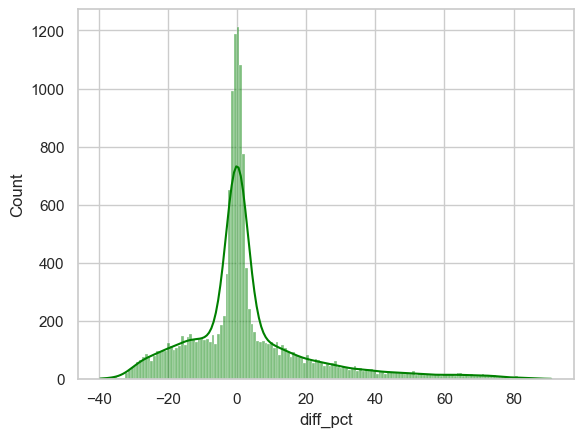

In [94]:
sns.histplot(results_df['diff_pct'], kde=True, color = 'green')

In [95]:
extreme_error_threshold = 10

extreme_results_df = results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]
extreme_results_df

,actual,predicted,diff,diff_pct
43608,20560,22636.707031,2076.707031,10.100715
42730,5018,7107.497559,2089.497559,41.640047
18936,8929,7971.675293,-957.324707,-10.721522
20029,5140,6583.516602,1443.516602,28.083981
4294,9631,6927.258789,-2703.741211,-28.073318
...,...,...,...,...
8767,8113,6527.432617,-1585.567383,-19.543540
25179,9944,7117.180664,-2826.819336,-28.427387
21592,8332,10605.906250,2273.906250,27.291242
49274,5571,6846.247559,1275.247559,22.890820


In [96]:
extreme_results_df.shape

(5752, 4)

In [97]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

38.4158151339077

In [98]:
results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct', ascending =False)

,actual,predicted,diff,diff_pct
898,3602,6876.266113,3274.266113,90.901336
36269,3501,6606.465820,3105.465820,88.702251
22007,3627,6808.825684,3181.825684,87.726101
42807,3629,6804.979980,3175.979980,87.516671
33257,3617,6779.875000,3162.875000,87.444706
...,...,...,...,...
4697,4326,6500.048828,2174.048828,50.255405
16908,4699,7060.041992,2361.041992,50.245627
35054,4384,6584.822754,2200.822754,50.201249
45659,4633,6956.721680,2323.721680,50.155875


In [99]:
X_test.index

Index([ 3598, 35794, 43608, 42730, 18936, 45416, 20029,  4294, 39145,  3152,
       ...
        4554,  9086,  8767,   603, 25179,  5621,  6069, 21592, 49274, 27977],
      dtype='int64', length=14973)

In [100]:
extreme_results_df.index

Index([43608, 42730, 18936, 20029,  4294, 44419, 17578,  6707, 11728, 15740,
       ...
       11230, 36158, 21184, 45020, 40342,  8767, 25179, 21592, 49274, 27977],
      dtype='int64', length=5752)

In [101]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
43608,0.537037,1.0,0.323232,0.5,0.0,0,1,0,0,0,1,0,0,0,0,0,1
42730,0.092593,0.2,0.131313,0.0,0.5,1,0,0,0,1,0,1,0,0,0,0,0
18936,0.074074,0.0,0.202020,0.0,0.5,1,0,0,1,1,0,1,0,0,1,0,1
20029,0.018519,0.2,0.030303,0.0,0.0,0,1,0,0,1,0,0,1,0,0,1,0
4294,0.000000,0.2,0.020202,0.0,0.0,1,0,0,1,1,0,1,0,0,0,0,0


<Axes: xlabel='income_lakhs', ylabel='Count'>

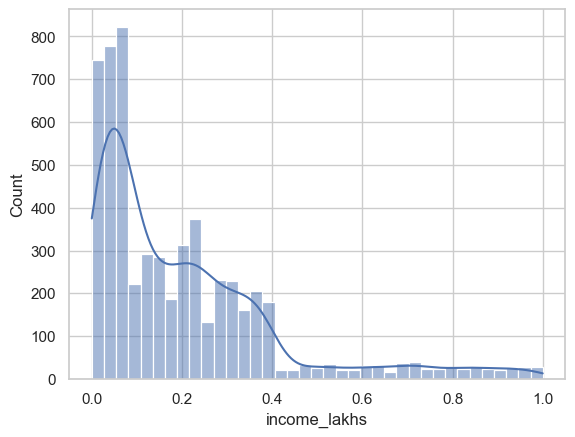

In [102]:
sns.histplot(extreme_errors_df.income_lakhs, kde=True)

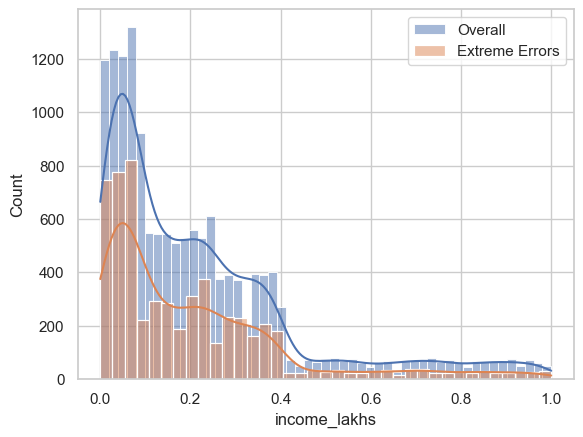

In [103]:
sns.histplot(X_test.income_lakhs, label = 'Overall', kde=True)
sns.histplot(extreme_errors_df.income_lakhs, label = 'Extreme Errors', kde=True)
plt.legend()
plt.show()

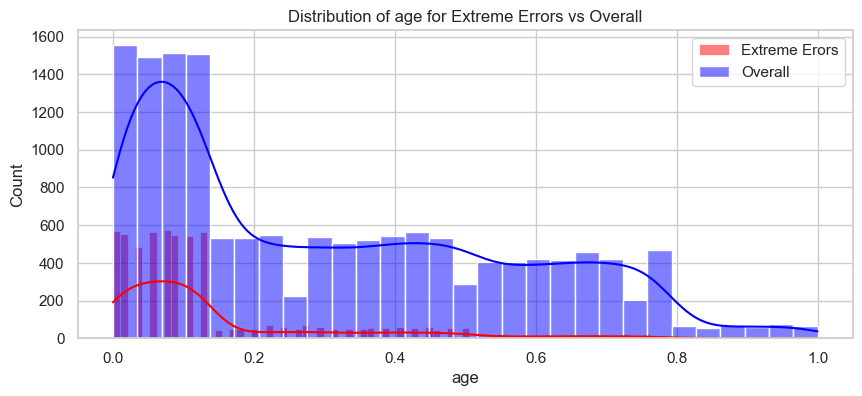

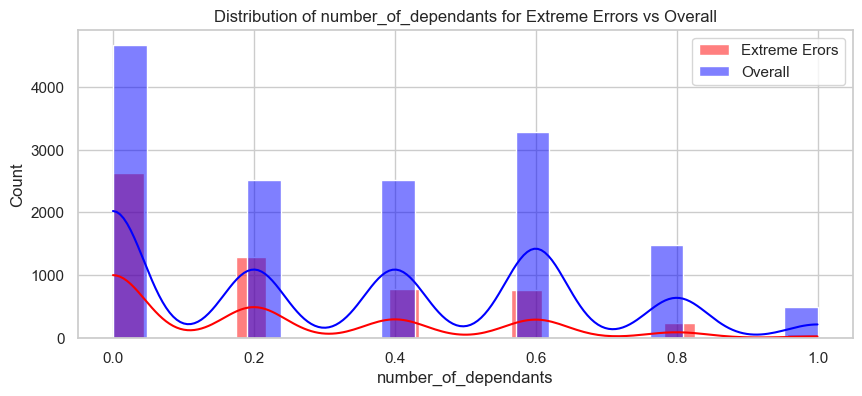

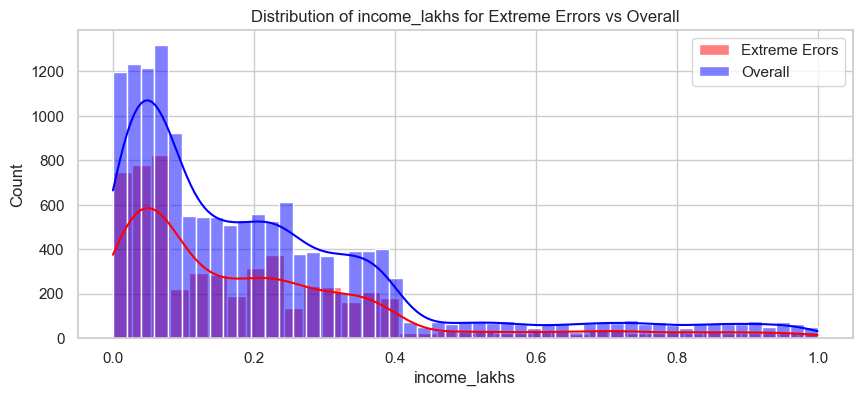

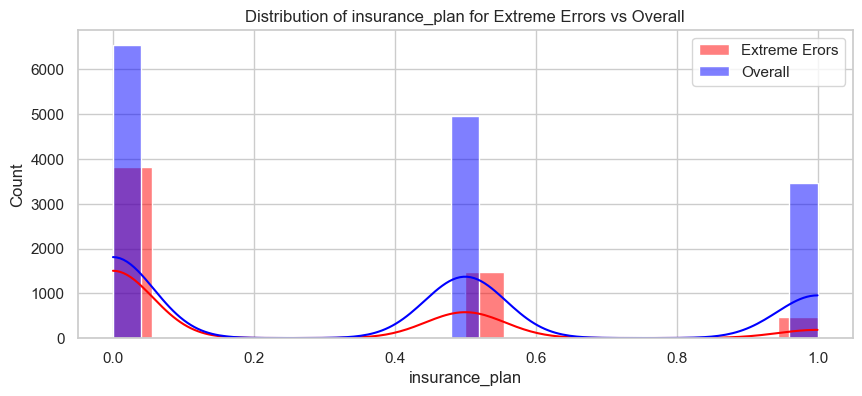

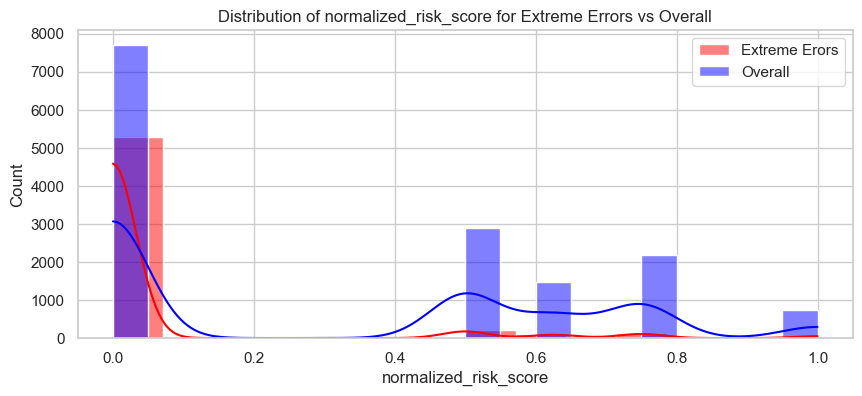

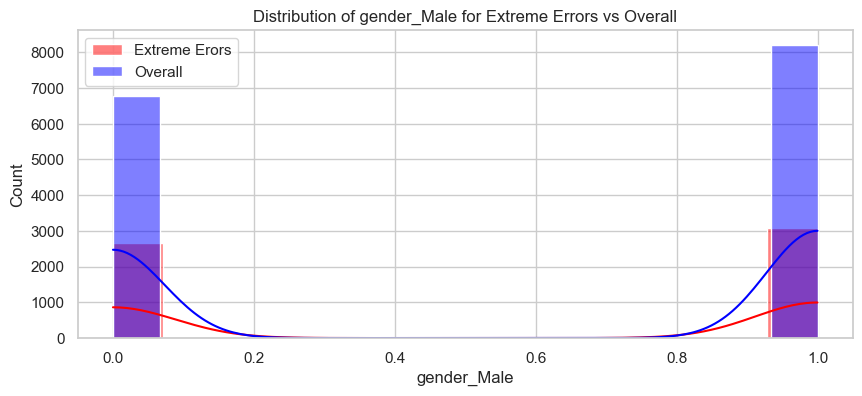

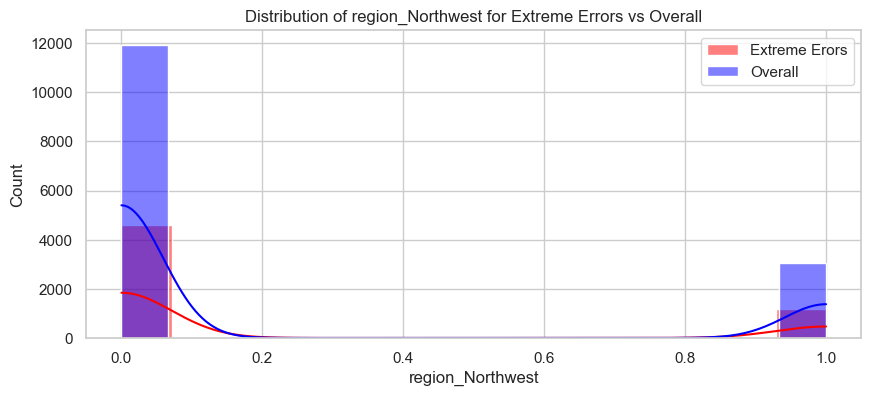

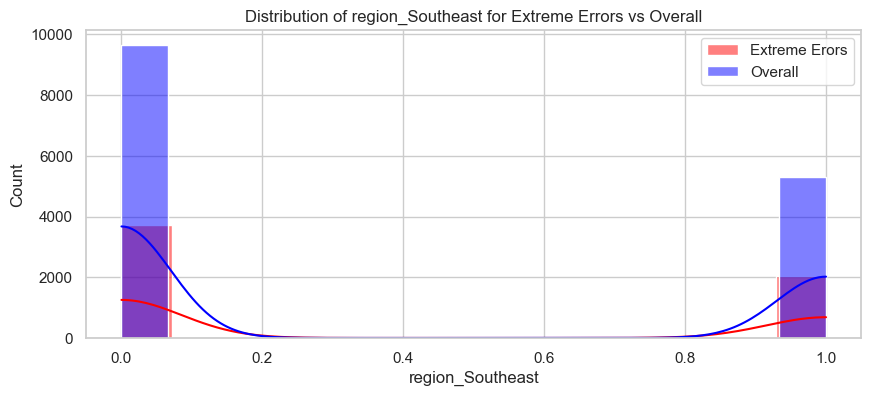

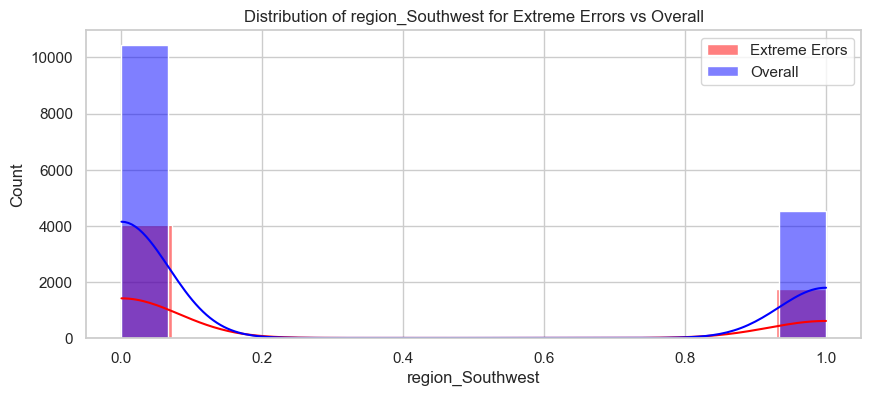

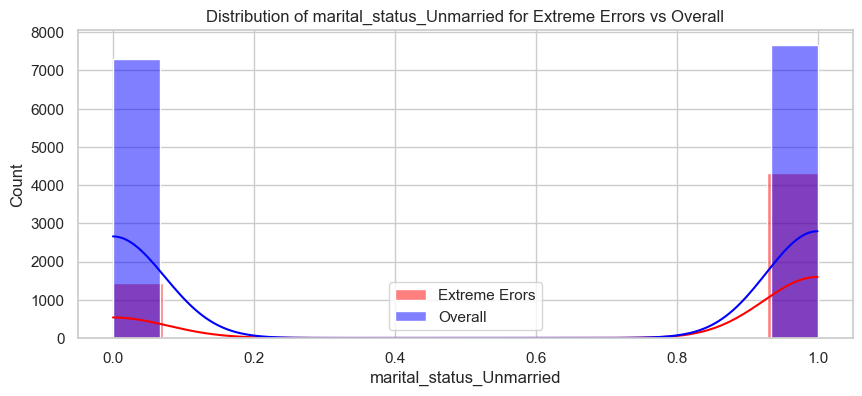

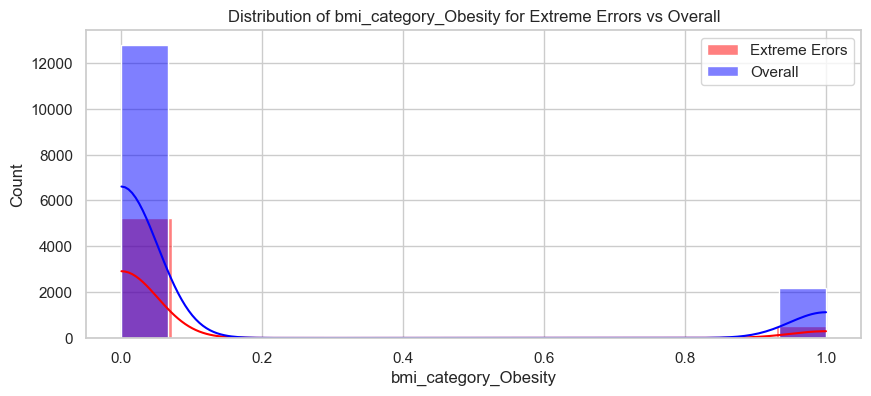

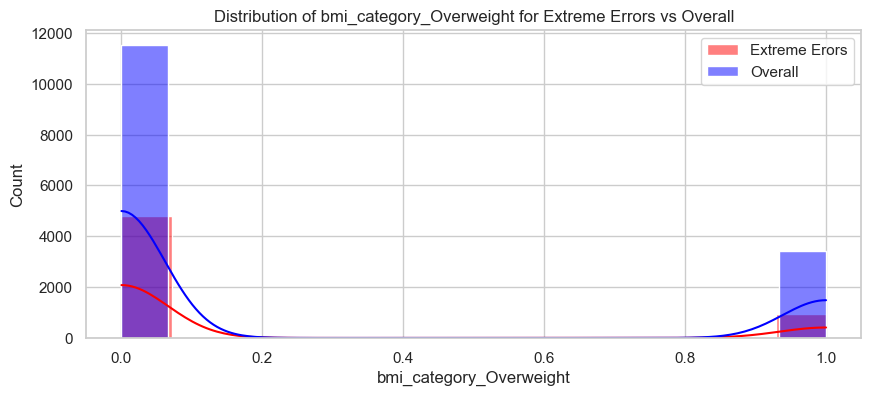

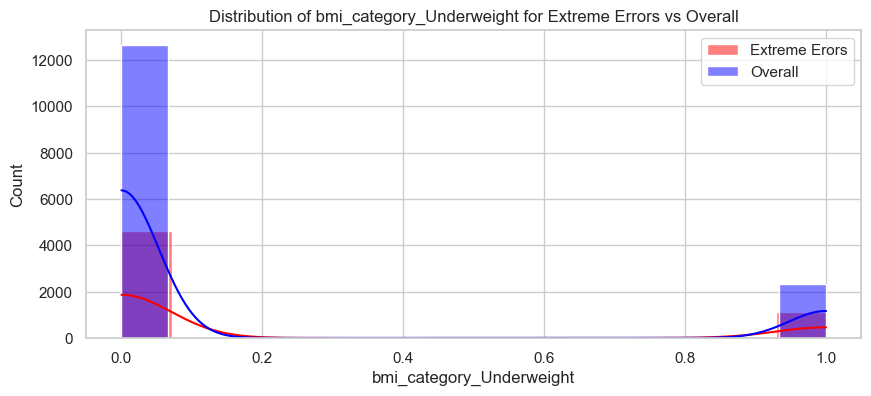

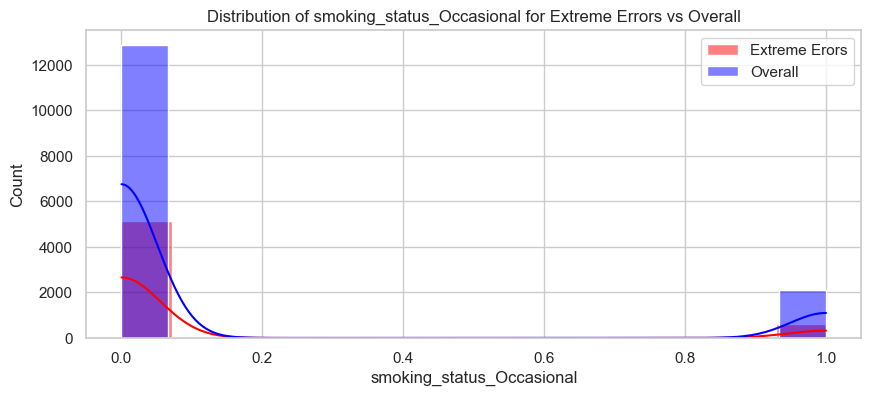

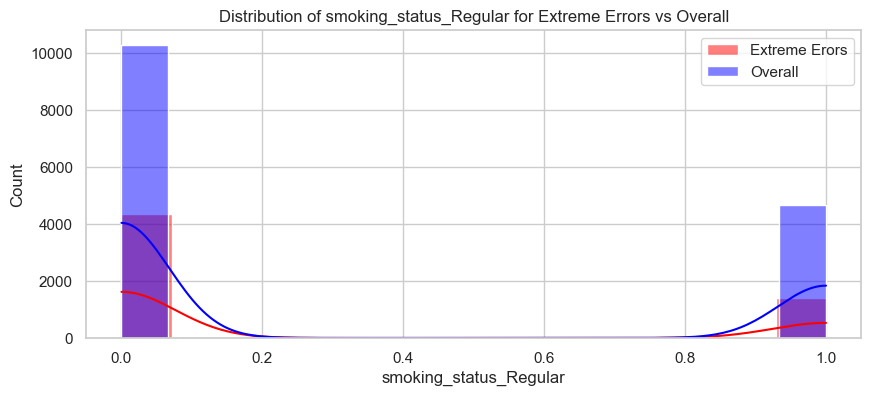

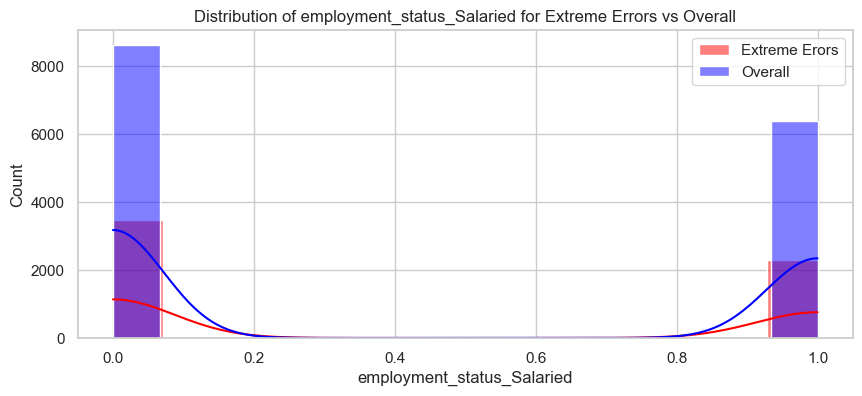

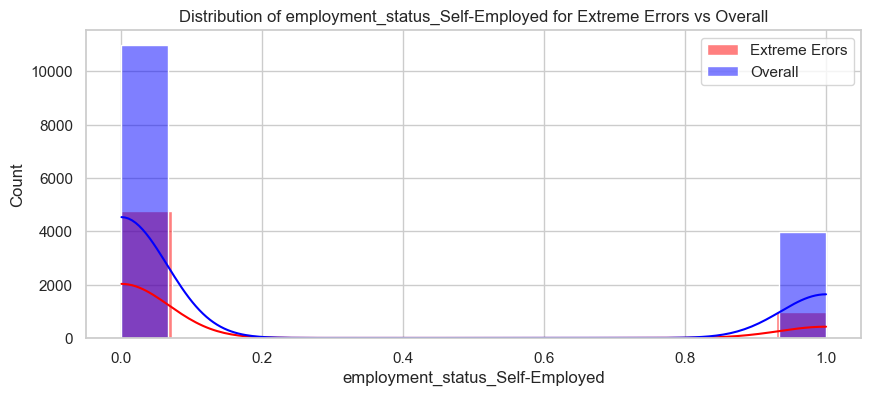

In [104]:
for feature in X_test.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(extreme_errors_df[feature], color='red', label ='Extreme Erors', kde= True)
    sns.histplot(X_test[feature], color='blue', label ='Overall', alpha =0.5, kde= True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

In [105]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan']

In [106]:
extreme_errors_df['income_level']=-1

In [107]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale]=scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,47.0,5.0,-2.0,33.0,2.0
1,23.0,1.0,-2.0,14.0,1.0
2,22.0,0.0,-2.0,21.0,1.0
3,19.0,1.0,-2.0,4.0,1.0
4,18.0,1.0,-2.0,3.0,1.0


In [108]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,5752.000000,5752.000000,5752.0,5752.000000,5752.000000
mean,25.719576,1.110570,-2.0,21.103095,1.416898
std,9.049187,1.284424,0.0,20.738202,0.636276
min,18.000000,0.000000,-2.0,1.000000,1.000000
25%,20.000000,0.000000,-2.0,6.000000,1.000000
50%,23.000000,1.000000,-2.0,15.000000,1.000000
75%,25.000000,2.000000,-2.0,30.000000,2.000000
max,72.000000,5.000000,-2.0,100.000000,3.000000


<Axes: xlabel='age', ylabel='Count'>

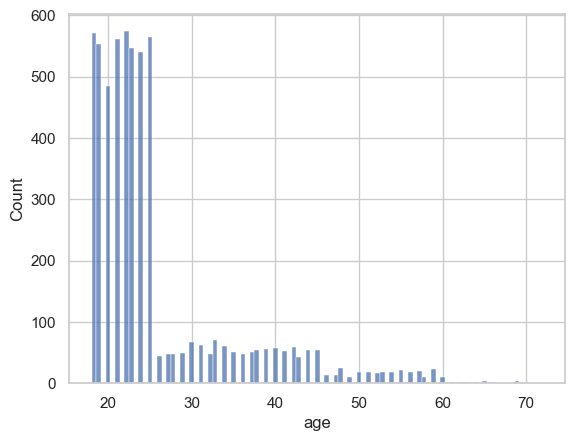

In [109]:
sns.histplot(df_reversed['age'])

In [110]:
df_reversed['age'].quantile(0.80)

30.000000000000004